In [1]:
!pip install yfinance
!pip install beautifulsoup4
!pip install requests


In [2]:
import yfinance as yf

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [3]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Step 1: Fetch HTML from Macrotrends
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url, headers={"User-Agent": "Mozilla/5.0"}).text

# Step 2: Parse the HTML
soup = BeautifulSoup(html_data, "html.parser")

# Step 3: Find the table
table = soup.find("table", class_="historical_data_table")

# Step 4: Create an empty list to store rows
rows = []

# Step 5: Loop through rows and extract data
for row in table.tbody.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        if revenue != "":
            rows.append({"Date": date, "Revenue": revenue})

# Step 6: Create DataFrame from list of dicts
tesla_revenue = pd.DataFrame(rows)

# Step 7: Display last 5 rows
tesla_revenue.tail()


,Date,Revenue
11,2013,2013
12,2012,413
13,2011,204
14,2010,117
15,2009,112


In [4]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674835,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578048,1.607505,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603296,1.662209,6892800,0.0,0.0


In [5]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# Step 1: Send request with headers to avoid 403 error
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36"
}
html_data = requests.get(url, headers=headers).text

# Step 2: Parse HTML
soup = BeautifulSoup(html_data, "html.parser")

# Step 3: Find the revenue table
tables = soup.find_all("table")

# Look for the correct table that contains "GameStop Quarterly Revenue"
revenue_table = None
for table in tables:
    if "GameStop Quarterly Revenue" in table.text:
        revenue_table = table
        break

# Step 4: If found, extract the data
if revenue_table:
    gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
    for row in revenue_table.find_all("tr")[1:]:
        cols = row.find_all("td")
        if len(cols) == 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip().replace("$", "").replace(",", "")
            if revenue:
                gme_revenue = pd.concat([
                    gme_revenue,
                    pd.DataFrame({"Date": [date], "Revenue": [revenue]})
                ], ignore_index=True)

    print(gme_revenue.tail())  # ✅ Output last 5 rows
else:
    print("Revenue table not found.")


          Date Revenue
61  2010-01-31    3524
62  2009-10-31    1835
63  2009-07-31    1739
64  2009-04-30    1981
65  2009-01-31    3492


In [6]:
import yfinance as yf
import pandas as pd

# Download Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)

# Show first few rows (optional)
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [7]:
data = {
    "Date": ["2023-12-31", "2023-09-30", "2023-06-30", "2023-03-31", "2022-12-31"],
    "Revenue": [25173, 23451, 24927, 23829, 24318]  # Example revenue in millions
}
tesla_revenue = pd.DataFrame(data)
tesla_revenue.head()


,Date,Revenue
0,2023-12-31,25173
1,2023-09-30,23451
2,2023-06-30,24927
3,2023-03-31,23829
4,2022-12-31,24318


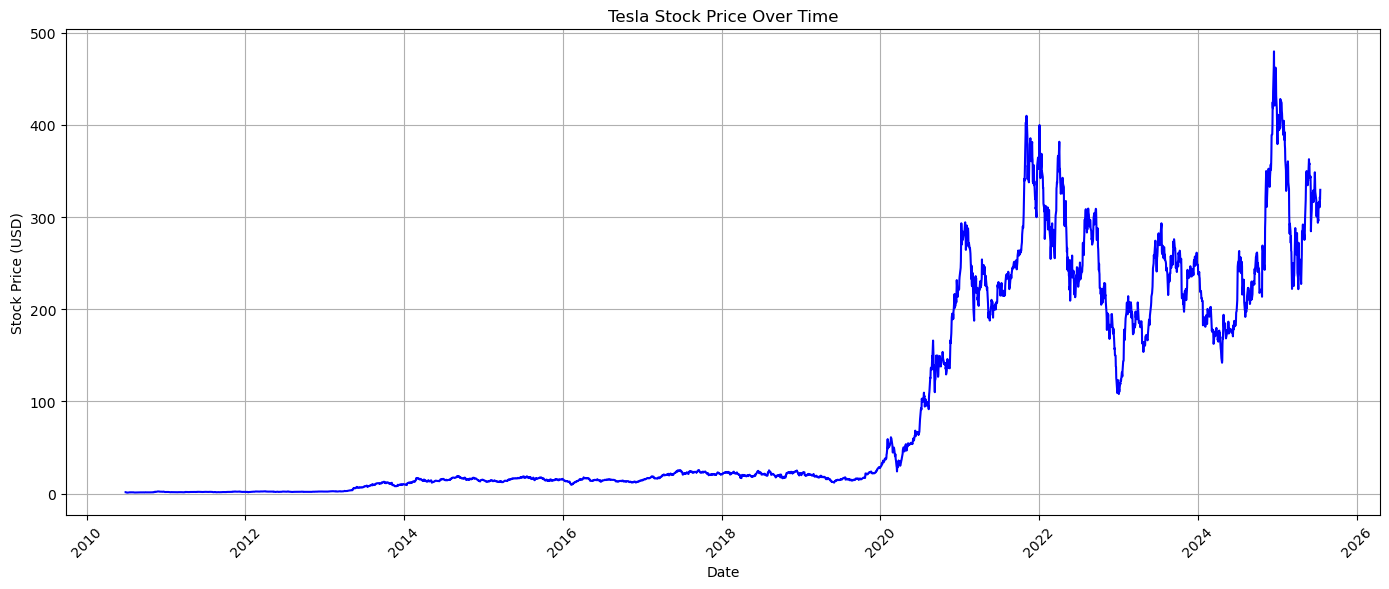

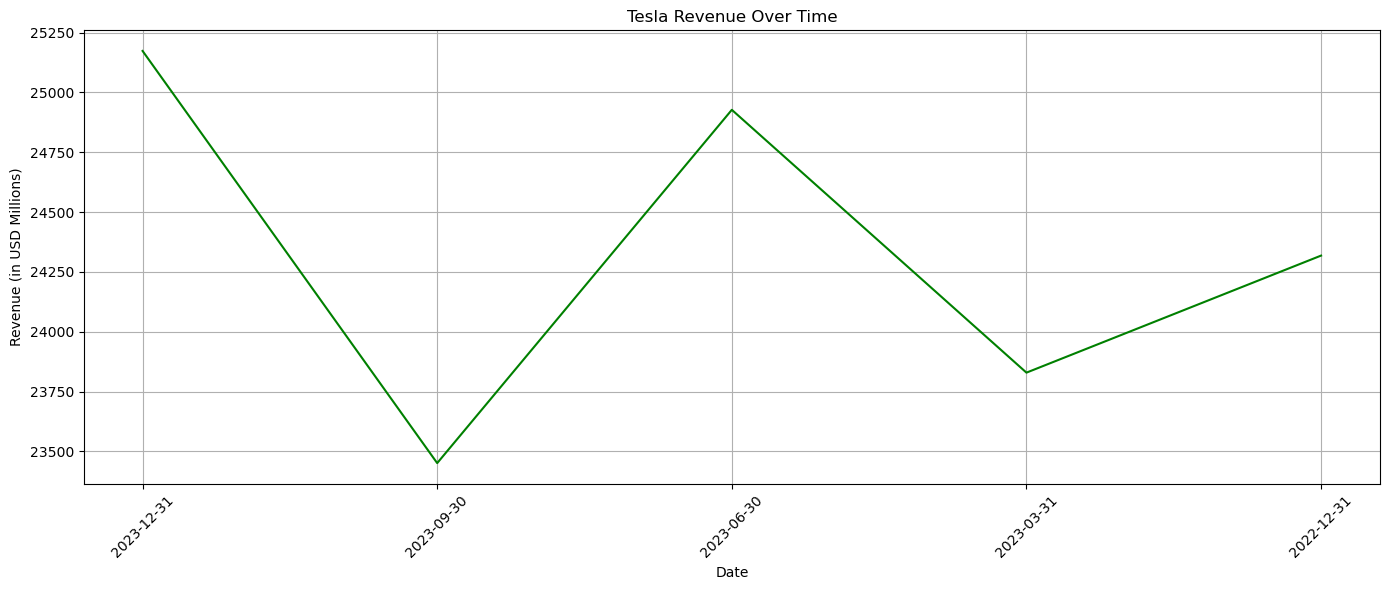

In [8]:
import matplotlib.pyplot as plt

# Tesla Stock Price
plt.figure(figsize=(14, 6))
plt.plot(tesla_data['Date'], tesla_data['Close'], color='blue')
plt.title("Tesla Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Tesla Revenue
plt.figure(figsize=(14, 6))
plt.plot(tesla_revenue['Date'], tesla_revenue['Revenue'], color='green')
plt.title("Tesla Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue (in USD Millions)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


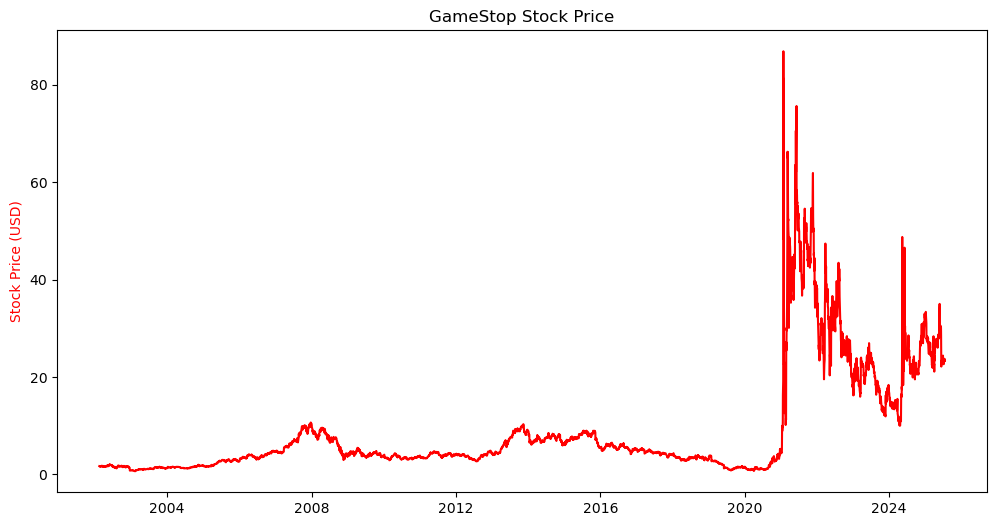

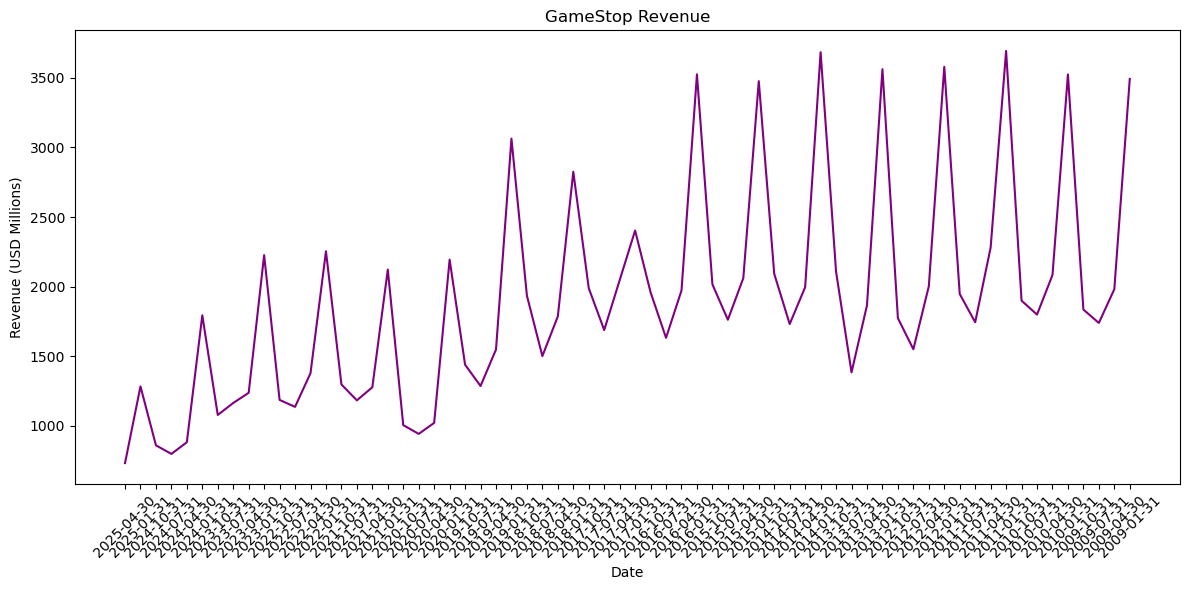

In [9]:
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(gme_data['Date'], gme_data['Close'], color="red")
ax1.set_ylabel("Stock Price (USD)", color="red")
ax1.set_title("GameStop Stock Price")

plt.figure(figsize=(12, 6))
plt.plot(gme_revenue['Date'], gme_revenue['Revenue'].astype(float), color="purple")
plt.title("GameStop Revenue")
plt.xlabel("Date")
plt.ylabel("Revenue (USD Millions)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
